
# Convolutional Wasserstein Barycenter example

This example is designed to illustrate how the Convolutional Wasserstein
Barycenter function of POT works.


In [4]:
# Author: Nicolas Courty <ncourty@irisa.fr>
#
# License: MIT License
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import ot
import cv2

## Data preparation

The four distributions are constructed from 4 simple images



In [5]:
#this_file = os.path.realpath('__file__')
#data_path = os.path.join(Path(this_file).parent.parent.parent, 'data')

f1 = 1 - plt.imread('../../data/images/redcross.png')[::2, ::2, 2]
f2 = 1 - plt.imread('../../data/images/tooth.png')[::2, ::2, 2]
f3 = 1 - plt.imread('../../data/images/heart.png')[::2, ::2, 2]
f4 = 1 - plt.imread('../../data/images/duck.png')[::2, ::2, 2]

f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A = np.array([f1, f2, f3, f4])

nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

## Barycenter computation and visualization




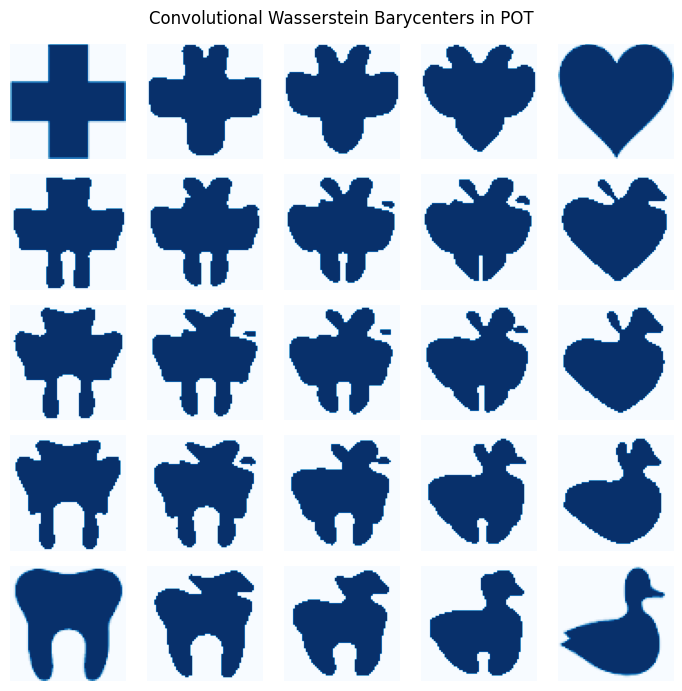

In [39]:
fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
plt.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            im = 255*ot.bregman.convolutional_barycenter2d(A, reg, weights)
            sharpened = cv2.filter2D(im, -1, np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]))
            axes[i, j].imshow(
                #ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cv2.threshold(sharpened,0.08,255,cv2.THRESH_OTSU)[1],
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [14]:
import cv2
